## Hexagonal bin plot

* 산점도 형태로 데이터를 표현할 때 데이터가 아주 많다면 그 데이터가 어느 부분의 수가 크고 작은지 구분해서 볼 때 사용
* Hexbin plot은 데이터가 클 때 각각의 점을 산점도(scatter plot)로 표현할 때의 단점을 보완할 수 있습니다.
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#hexagonal-bin-plot

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제 해결
mpl.rcParams['axes.unicode_minus'] = False

In [7]:
# 1000개의 행과 2개의 열이 있는 데이터 프레임 생성

df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])

# np.arange() : 0~999까지 숫자
df['b'] = df['b'] + np.arange(1000)
df

,a,b
0,-0.533427,-0.736399
1,-0.315658,0.459045
2,-0.287241,2.503054
3,-0.357501,4.635458
4,0.455037,4.348293
...,...,...
995,1.335365,994.364149
996,-1.729991,997.521443
997,-0.269519,998.130955
998,0.360176,998.817376


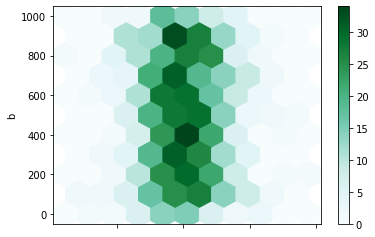

In [8]:
# gridsize 에 따라 격자의 수가 달라짐
# gridsize 값 변경해 가면서 테스트 해보기

df.plot.hexbin(x='a', y='b', gridsize=10)

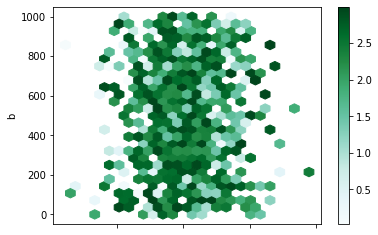

In [10]:
# 이전 데이터프레임에 컬럼 추가하면서 확인

df['z'] = np.random.uniform(0, 3, 1000)


df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.max, gridsize=25)

* reduce_C_function : 기본적으로 각 (x, y) 점 주변의 개수에 대한 히스토그램이 계산됩니다. C 및 reduce_C_function 인수에 값을 전달하여 대체 집계를 지정할 수 있습니다. C는 각 (x, y) 점에서 값을 지정하고 reduce_C_function은 빈의 모든 값을 단일 숫자 (예 : 평균, 최대 값, 합계, 표준)로 줄이는 하나의 인수의 함수입니다. 이 예에서 위치는 열 (column) a 및 b에 의해 주어지며 값은 열 (z)에 의해 주어진다. 빈은 NumPy의 max 함수로 집계됩니다.

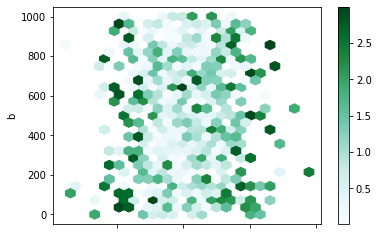

In [12]:
# 최소값

df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.min, gridsize=25)

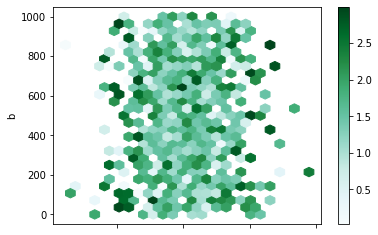

In [13]:
df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.mean, gridsize=25)